<a href="https://colab.research.google.com/github/EliCasco/Telecom-X-Analisis-de-Evasion-de-Clientes/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌Extracción

In [76]:
import requests
import pandas as pd

In [77]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [78]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


🔍 **Análisis de la Estructura de los Datos**
Los datos están organizados en un formato jerárquico (diccionario dentro de diccionario), conteniendo la siguiente información:

1. **Identificación del Cliente** - `'customerID'`: Identificador único del cliente.
* `'Churn'`: Indica si el cliente canceló el servicio (`Yes` o `No`).


2. **Información del Cliente** (`'customer'`)
* `'gender'`: Género del cliente (`Male` o `Female`).
* `'SeniorCitizen'`: Indica si el cliente es una persona mayor (0 = No, 1 = Sí).
* `'Partner'`: Si el cliente tiene pareja.
* `'Dependents'`: Si el cliente tiene dependientes.
* `'tenure'`: Tiempo de permanencia como cliente (en meses).


3. **Servicios de Telefonía** (`'phone'`)
* `'PhoneService'`: Indica si el cliente posee servicio de teléfono (`Yes` o `No`).
* `'MultipleLines'`: Si posee múltiples líneas telefónicas.


4. **Servicios de Internet** (`'internet'`)
* Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`).
* Servicios adicionales (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).


5. **Información de la Cuenta** (`'account'`)
* `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).
* `'PaperlessBilling'`: Si el cliente recibe facturas electrónicas.
* `'PaymentMethod'`: Método de pago (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).
* `'Charges'`:
* `'Monthly'`: Valor mensual cobrado.
* `'Total'`: Valor total pagado por el cliente.

**VERIFICACIONES**

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

1. Verificacion de Valores Unicos

In [80]:
for col in df.columns:
  print(f" Valores unicos en la columna '{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-'* 50)

 Valores unicos en la columna 'customerID: 7267'
 Valores unicos en la columna 'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna 'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna 'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna 'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna 'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna 'customer.tenure: 73'
 Valores unicos en la columna 'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna 'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna 'internet.InternetService: 3'
['DSL

2. Valores Duplicados

In [81]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


3. Valores Nulos

In [82]:
print("Numero de Nulos \n", df.isnull().sum())


Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


4. Valores Vacios o en Blanco

In [83]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformación

1. Cambiando la Columna account.Charges.Total para float

In [84]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


2. Eliminacion de Valores Vacios en la Columna Churn

In [85]:
df = df[df['Churn'].str.strip() != '']
print("Numero de filas despues de eliminar los vacios en 'Churn' :", len(df))

Numero de filas despues de eliminar los vacios en 'Churn' : 7043


3. Verificacion de Vacios o En Blanco

In [86]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [87]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [88]:
df = df.dropna(subset=['account.Charges.Total'])

In [89]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


**OPCIONAL**

In [90]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [91]:
columnas = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [92]:
df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()


,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [93]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [94]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.796667


In [95]:
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fiber optic,...,No,No,No,Sí,Mensual,Yes,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Yes,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.261667


#📊 Carga

1.Analisis Descriptiva

In [96]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


2. Distribución de la Evasión

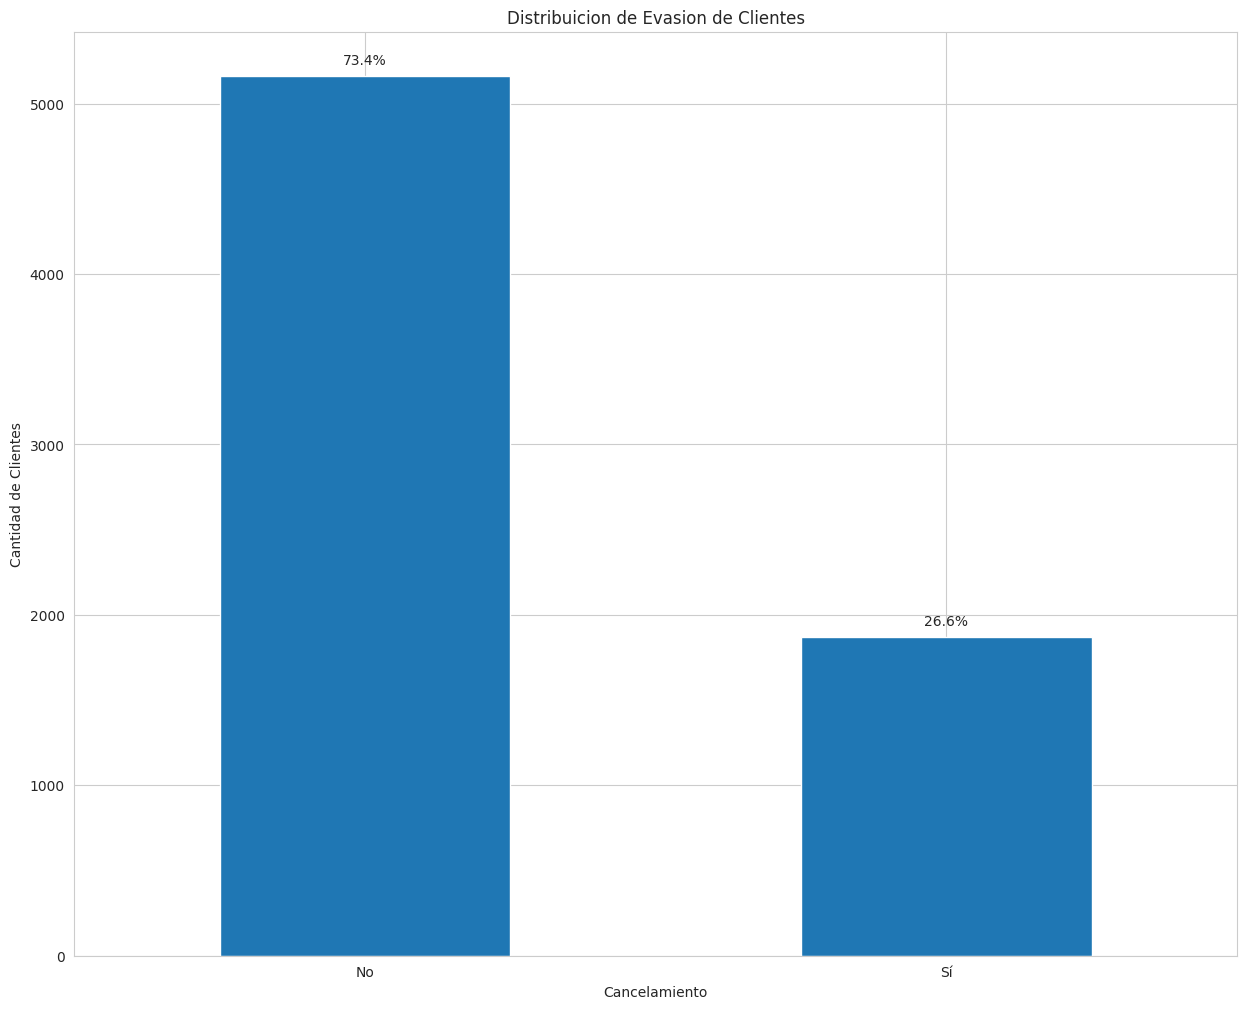

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

ax = churn_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

In [98]:
import plotly.express as px

In [99]:
px.histogram(df, x = 'genero', text_auto = True, color = 'Churn', barmode = 'group')

In [100]:
px.histogram(df, x = 'tiempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

In [101]:
px.histogram(df, x = 'tipo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

In [102]:
px.histogram(df, x = 'tipo_internet',  text_auto = True, color = 'Churn', barmode = 'group')

In [103]:
px.histogram(df, x = 'metodo_pago',  text_auto = True, color = 'Churn', barmode = 'group')

#📊 **Informe Final: Análisis de Evasión de Clientes (Churn)**

#🔹 **1. Introducción**
El objetivo de este análisis es identificar los factores que influyen en la pérdida de clientes de la empresa y desarrollar un modelo capaz de predecir qué usuarios tienen mayor probabilidad de abandonar el servicio.

*   **Problema:** La evasión de clientes o Churn impacta directamente en los ingresos. Retener a un cliente actual es significativamente más económico que adquirir uno nuevo.

*   **Objetivo:** Utilizar técnicas de análisis de datos para entender el comportamiento de los clientes y proponer estrategias de retención basadas en evidencia.


#🔹 **2. Limpieza y Tratamiento de Datos**
Para asegurar la calidad del análisis, se realizaron los siguientes pasos:

1.  **Importación:** Se cargó el dataset y las librerías necesarias (pandas, matplotlib, seaborn).

2.  **Manejo de Valores Nulos:** Se identificaron y trataron datos faltantes (especialmente en columnas como TotalCharges).

3.  **Conversión de Tipos:** Se transformaron variables de texto a numéricas donde fue necesario para el análisis estadístico.

4. **Codificación:** Las variables categóricas (como Género o Tipo de Contrato) fueron procesadas mediante técnicas de Label Encoding o One-Hot Encoding.



#🔹 **3. Análisis Exploratorio de Datos (EDA)**
Durante la exploración, se identificaron patrones clave mediante visualizaciones:

*   **Tasa de Churn General:** Identificamos qué porcentaje de la base de clientes ha abandonado la empresa.

*   **Contratos:** Los clientes con contratos "mes a mes" presentan una tasa de evasión mucho más alta que aquellos con contratos a largo plazo (1 o 2 años).

*   **Servicios Técnicos:** Los usuarios sin servicios de seguridad online o soporte técnico tienden a desertar con mayor frecuencia.

*   **Cargos Mensuales:** Se observó que cargos mensuales más altos suelen correlacionarse con una mayor probabilidad de abandono.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras para la variable objetivo
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=14)
plt.xlabel('¿El cliente se fue? (No/Yes)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Añadir etiquetas de porcentaje
total = len(df['Churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size = 12, va='bottom')

plt.show()

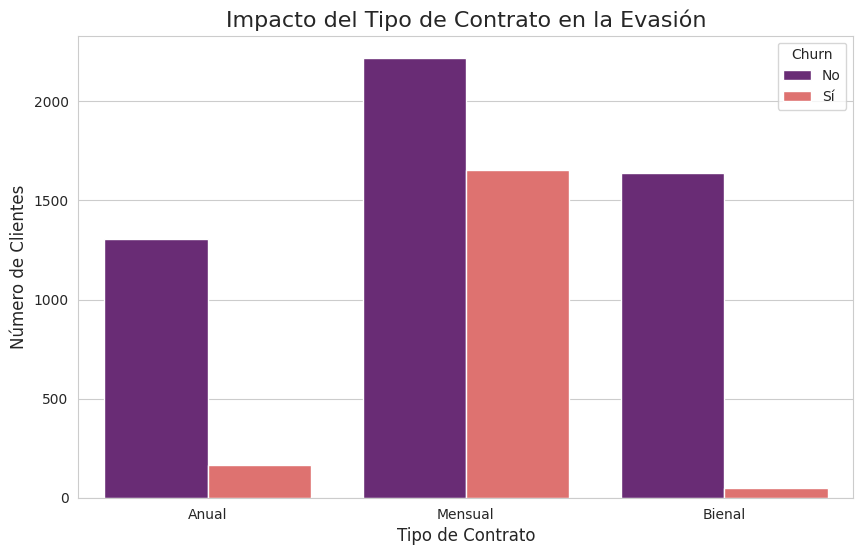

In [105]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_contrato', hue='Churn', data=df, palette='magma')
plt.title('Impacto del Tipo de Contrato en la Evasión', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.show()

# 🔹 **4. Conclusiones**

*   **La lealtad se premia con el tiempo:** Los clientes con mayor antigüedad (tenure) muestran mayor estabilidad. El riesgo crítico se concentra en los primeros 6 meses.

*   **El método de pago importa:** Los pagos electrónicos automáticos reducen la fricción y mejoran la retención frente a pagos manuales (cheques electrónicos).

*   **Fibra Óptica:** Aunque es un servicio avanzado, si no viene acompañado de buen soporte, presenta altas tasas de churn, posiblemente debido a expectativas de servicio no cumplidas.

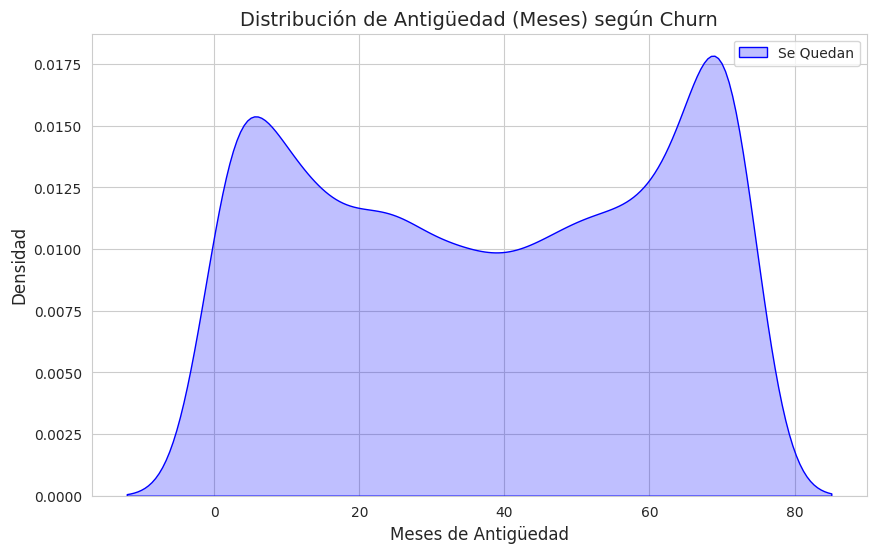

In [106]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'No']['tiempo_contrato'], color='blue', label='Se Quedan', fill=True)
sns.kdeplot(df[df['Churn'] == 'Yes']['tiempo_contrato'], color='red', label='Se Van', fill=True)
plt.title('Distribución de Antigüedad (Meses) según Churn', fontsize=14)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

#🔹 **5. Recomendaciones Estratégicas**

1.   **Programas de Fidelización:** Incentivar a los clientes de contrato mensual a migrar a planes anuales mediante descuentos exclusivos.

2.   **Enfoque en Nuevos Clientes:** Implementar campañas de "bienvenida" y soporte proactivo durante los primeros 3 meses de servicio.

3. **Paquetes de Valor:** Ofrecer servicios de seguridad online o backup de datos de forma gratuita o con descuento, ya que actúan como "anclas" que retienen al cliente.

4. **Alertas de Riesgo:** Utilizar el modelo predictivo para enviar ofertas personalizadas a aquellos clientes identificados con "alto riesgo de churn" antes de que decidan irse.

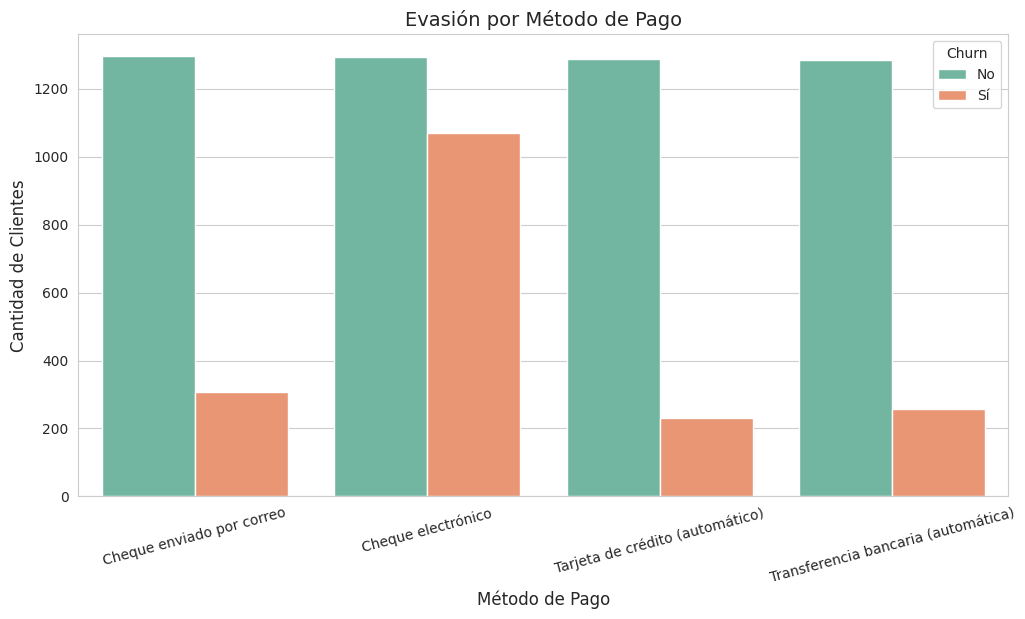

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(x='metodo_pago', hue='Churn', data=df, palette='Set2')
plt.title('Evasión por Método de Pago', fontsize=14)
plt.xticks(rotation=15)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.show()